
# 线性回归演示
&nbsp;&nbsp;&nbsp;&nbsp; 如何根据一个人的身高估算一个人的体重？在网上搜索会有各种答案：    
有直接相减的：    
&nbsp;&nbsp;&nbsp;&nbsp;    体重（kg）= [身高（cm）-110]      
&nbsp;&nbsp;&nbsp;&nbsp;    体重（kg）= [身高（cm）-105]      
&nbsp;&nbsp;&nbsp;&nbsp;    体重（kg）= [身高（cm）-100]    
有乘以系数的：
&nbsp;&nbsp;&nbsp;&nbsp;    体重（kg）=[身高（cm）-100]×0.9      
&nbsp;&nbsp;&nbsp;&nbsp;    男性：体重 =（身高cm-80）×70%      
&nbsp;&nbsp;&nbsp;&nbsp;    女性：体重 =（身高cm-70）×60%      
&nbsp;&nbsp;&nbsp;&nbsp;    北方人：体重（kg）=[身高（cm）-150]×0.6+50       
&nbsp;&nbsp;&nbsp;&nbsp;    南方人：体重（kg）=[身高（cm）-150]×0.6+48      
这些公式基本上都是直线的公式 $ y = a + b x $形式的结构，那这些公式是科学家们咋计算出来的呢？  
是根据一组组的数据反推出来的

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
x = [13854,12213,11009,10655,9503]
x = np.reshape(x,newshape=(5,1)) / 10000.0
y =  [21332, 20162, 19138, 18621, 18016]
y = np.reshape(y,newshape=(5,1)) / 10000.0
print(x)
print(y)

[[1.3854]
 [1.2213]
 [1.1009]
 [1.0655]
 [0.9503]]
[[2.1332]
 [2.0162]
 [1.9138]
 [1.8621]
 [1.8016]]


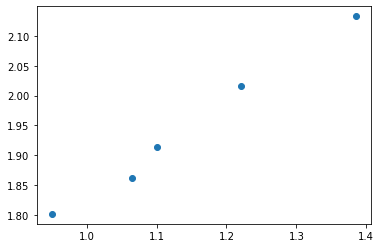

In [49]:
plt.scatter(x,y)
plt.show()

## 数据分析 Data Analysis
看样子像一条直线

## 算法采用 Algorithm

铁三角：

模型 Model

损失函数 Cost Function

优化方法 Optimization Method 

模型 -> 损失函数 -> 优化方法

In [5]:
def model(a, b, x):
    return a*x + b

def cost_function(a, b, x, y):
    n = 5
    return 0.5/n * (np.square(y-a*x-b)).sum()

def optimize(a,b,x,y):
    n = 5
    alpha = 1e-1
    y_hat = model(a,b,x)
    da = (1.0/n) * ((y_hat-y)*x).sum()
    db = (1.0/n) * ((y_hat-y).sum())
    a = a - alpha*da
    b = b - alpha*db
    return a, b


初始化

In [6]:
a = 0
b = 0

第一次遍历

In [8]:
def iterate(a,b,x,y,times):
    for i in range(times):
        a,b = optimize(a,b,x,y)

    y_hat=model(a,b,x)
    cost = cost_function(a, b, x, y)
    print(a,b,cost)
    plt.scatter(x,y)
    plt.plot(x,y_hat)
    return a,b

0.22441501579999998 0.19453800000000002 1.1195136204857177


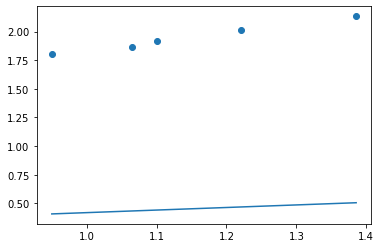

In [9]:
a,b = iterate(a,b,x,y,1)

继续遍历

0.7678944854569089 0.6665363704212185 0.08000927296574874


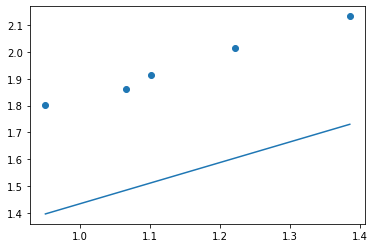

In [10]:
a,b = iterate(a,b,x,y,5)

0.9501078460921074 0.8275889325111171 0.000808072467982241


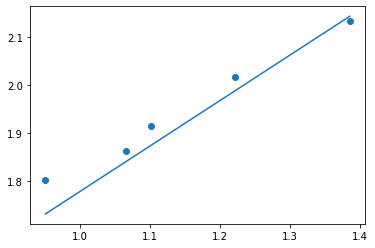

In [11]:
a,b = iterate(a,b,x,y,10)

0.9483311054752765 0.8580980023959833 0.0003466528413780967


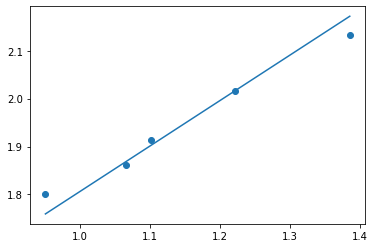

In [12]:
a,b = iterate(a,b,x,y,100)

0.8505560785076288 0.9710872023538262 0.00010710264569567503


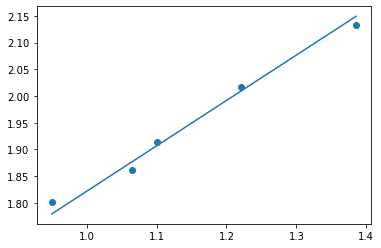

In [13]:
a,b = iterate(a,b,x,y,1000)

0.7884707126333258 1.042833291685438 6.454779324956897e-05


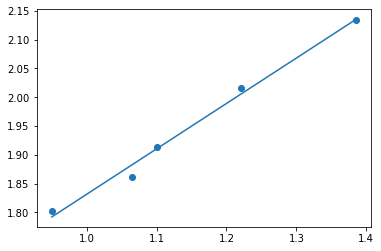

In [14]:
a,b = iterate(a,b,x,y,10000)

## 模型评价
计算R平方

In [15]:
y_hat=model(a,b,x)
y_bar = y.mean()
SST = np.square(y - y_bar).sum()
SSR = np.square(y_hat - y_bar).sum()
SSE = np.square(y_hat - y).sum()
SST, SSR, SSE

(0.06889736799999996, 0.06825272967982761, 0.0006454779324956859)

In [16]:
y_hat

array([[2.13518062],
       [2.00579257],
       [1.9108607 ],
       [1.88294884],
       [1.79211701]])

In [17]:

y_hat-y

array([[ 0.00198062],
       [-0.01040743],
       [-0.0029393 ],
       [ 0.02084884],
       [-0.00948299]])

证明 SST=SSR+SSE

In [18]:
error = SST - SSR -SSE
error

-8.396123233360073e-07

In [19]:
R_Square = SSR/SST
R_Square

0.9906434985996512

## 附录1 损失函数的微分（可选）

In [20]:
import sympy

In [21]:
a = sympy.Symbol("a")
b = sympy.Symbol("b")
x = sympy.Symbol("x")
y = sympy.Symbol("y")

In [22]:
f_cost = 1.0/2 * (y - a*x - b)**2

In [23]:
f_cost

0.5*(-a*x - b + y)**2

In [24]:
sympy.diff(f_cost,a)

-1.0*x*(-a*x - b + y)

In [25]:
sympy.diff(f_cost,b)

1.0*a*x + 1.0*b - 1.0*y